In [3]:
using Plots, LaTeXStrings

pyplot(grid=:false)

Plots.PyPlotBackend()

In [4]:
"""
    iteramapeo(f, x0, n)

Esta función itera el mapeo `f`, usando como condición inicial `x0`, `n` veces
y regresa dos vectores que continen la secuencia de puntos, incluyendo las
*visitas* a la diagonal.
"""
function iteramapeo(f, x0, n)
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end

iteramapeo (generic function with 1 method)

# Bifurcaciones

## Un ejemplo de bifurcación

Consideremos la *familia* de mapeos cuadráticos dada por

\begin{equation}
    Q_c(x) = x^2 + c,
\end{equation}

donde $c\in\mathbb{R}$ es un parámetro. Estudiaremos, por un lado, cómo dependen los puntos fijos de $c$, y su estabilidad.

Los puntos fijos satisfacen la ecuación $Q_c(x) = x^2+c=x$, de donde obtenemos dos raíces:

\begin{eqnarray}
p_+(c) & = & \frac{1}{2}( 1 + \sqrt{1-4c} ),\\
p_-(c) & = & \frac{1}{2}( 1 - \sqrt{1-4c} ).\\
\end{eqnarray}

De la expresión anterior para las raíces vemos que, si $1-4c<0$ (es decir, $c>1/4$) **no** existen puntos fijos (reales) del mapeo cuadrático. En este caso, *toda* condición inicial termina en infinito.

En cambio, si se satisface que $c<1/4$, entonces existen dos puntos fijos. En este último caso tenemos que $p_+(c)\ge 1/2 \ge p_-(c)$; las igualdades sólo ocurren para $c=1/4$, es decir, en la bifurcación.

Esta *transición* en la que no tenemos puntos fijos ($c>1/4$) a la que tenemos dos ($c<1/4$) al variar un parámetro es lo que se llama una *bifurcación*. En este caso concreto, es una *bifurcación de silla-nodo* (saddle-node) o *bifurcación tangente*.

```julia
Qc(x,c) = x^2 + c       # Mapeo cuadrático

qc1 = x -> Qc(x, 0.5)   # Mapeo cuadrático con c =  0.5
qc2 = x -> Qc(x, -0.5)  # Mapeo cuadrático con c = -0.5
qc3 = x -> Qc(x, 0.25)  # Mapeo cuadrático con c =  0.25

domx = -1:1/32:2

p = plot(domx, qc1, xaxis=(L"x", ), yaxis=L"Q_c(x)", 
label=L"Q_{0.5}(x)")
plot!(domx, qc2, xaxis=(L"x", ), yaxis=L"Q_c(x)", 
label=L"Q_{-0.5}(x)")
plot!(domx, qc3, xaxis=(L"x"), label=L"Id(x)")
plot!(domx, identity, xaxis=(L"x"), label=L"Id(x)", color=:red)
png("fig07-1")
```

In [5]:
Qc(x,c) = x^2 + c       # Mapeo cuadrático



qc1 = x -> Qc(x, 0.5)   # Mapeo cuadrático con c =  0.5

qc2 = x -> Qc(x, -0.5)  # Mapeo cuadrático con c = -0.5

qc3 = x -> Qc(x, 0.25)  # Mapeo cuadrático con c =  0.25



domx = -1:1/32:2



p = plot(domx, qc1, xaxis=(L"x", ), yaxis=L"Q_c(x)", 

label=L"Q_{0.5}(x)", size=(800,500))

plot!(domx, qc2, xaxis=(L"x", ), yaxis=L"Q_c(x)", 

label=L"Q_{-0.5}(x)")

plot!(domx, qc3, xaxis=(L"x"), label=L"Id(x)")

plot!(domx, identity, xaxis=(L"x"), label=L"Id(x)", color=:red)

png("fig07-1")

[Plots.jl] Initializing backend: pyplot


![](fig07-1.png)

Como hemos visto, la derivada del mapeo evaluada en los puntos fijos da información sobre el caracter atractivo o repulsivo del punto fijo. En el caso del mapeo cuadrático tenemos que $Q_c'(x) = 2x$.

Por lo tanto, el punto fijo $p_+(c)$ *siempre* es repulsivo.

En cuanto a $p_-(c)$, el punto será atractivo si se cumple $|Q_c'(p_-(c))| = 2 |p_-(c)|<1$. De aquí es fácil obtener
que debe cumplirse la desigualdad 

\begin{equation}
-1 < 1 - \sqrt{1-4c} < 1,
\end{equation}

que equivale a $2 > \sqrt{1-4c} > 0$, lo que nos conduce a la condición $1/4 > c > -3/4$ para que $p_-(c)$ sea un punto atractivo.

Todo esto se puede resumir con el siguiente *diagrama de bifurcación*.

In [6]:
pplus(c) = 0.5*(1+sqrt(1-4*c))
pminus(c) = 0.5*(1-sqrt(1-4*c))
domc = -2:1/64:1/4

plot(-2:1/64:1/4, pplus, xaxis=(L"c", (-2,1)), yaxis=(L"p_\pm(c)"), label=L"p_+(c)", color=:red)
plot!(-3/4:1/64:1/4, pminus, label=L"p_-(c)", color=:blue)
plot!(-2:1/64:-3/4, pminus, label="", color=:red, line=(:dash))
png("fig07-2")

![](./fig07-2.png)

El diagrama de bifurcación anterior fue obtenido a partir de la dependencia de los puntos fijos del parámetro $c$. Uno puede obtener la parte estable de este diagrama de bifurcación de manera numérica, iterando el mapeo varias veces y usando una condición inicial $x_0$ que esté en la cuenca de atracción de $p_-(c)$.

**Ejercicio 1:**

- Obtengan el diagrama de bifurcación anterior del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial.

- Caractericen la cuenca de atracción de $p_-(c)$ cuando el punto es estable.

- ¿Qué pasa si $c < -3/4$ con el diagrama de bifurcaciones?

In [7]:
"""
      iterator(f, n, x0)
      OUT: solutions

This is a function used to iterate a single variable function `f` (R -> R).

"""

function iterator(f, n::Int, x0, r)

    solution = [x0]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(solution[i],r)
        push!(solution, x_new)
        #push!(steps, i)

    end

    return solution

end

iterator (generic function with 1 method)

In [8]:
f1(x, c) = x^2 + 0.5

f1 (generic function with 1 method)

In [9]:
iterator(f1, 1, 0.4, 0.5)

2-element Array{Float64,1}:
 0.4 
 0.66

In [10]:
function bifurcation_function(x0, n, range_r, k)
    
    orbit = Float64[]
    r_par = Float64[]
    
    for r in range_r
        
        solution = [x0]
        #steps = Int[0]
        x_old = x0
        
        for i in 1:n

            x_new = x_old^2 + r
            push!(solution, x_new)
            #push!(steps, i)
            x_old = x_new

        end
            
        deleteat!(solution, 1:k) #Remove the transient.
        rs = similar(solution)
        
        for i in 1:length(solution)
            
            rs[i] = r
            
        end
        
        append!(orbit, solution)
        append!(r_par, rs)
        
    end
    
    return r_par, orbit
    
end

bifurcation_function (generic function with 1 method)

In [23]:
c_parametro, orbita = bifurcation_function(0.5, 1000, -2.0:1/256:1/4, 0)

([-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0  …  0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25],[0.5,-1.75,1.0625,-0.871094,-1.2412,-0.459433,-1.78892,1.20024,-0.559427,-1.68704  …  0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])


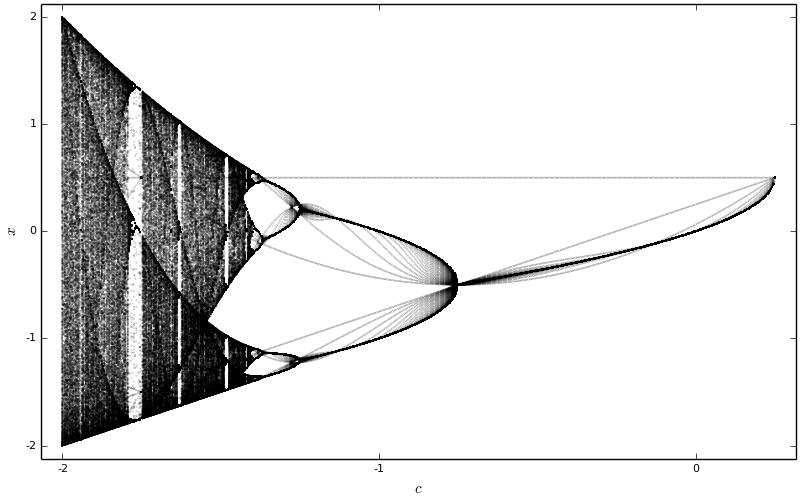

In [24]:
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=false, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))

El escenario descrito anteriormente es lo que constituye a la bifurcación silla-nodo o tangente. 

Formalmente, tenems que la bifurcación de silla-nodo para una familia monoparamétrica $F_\lambda$ ocurre en $\lambda_0$, cuando existe un intervalo *abierto* $I$ y un $\epsilon>0$ tal que:

1. Para $\lambda_0-\epsilon<\lambda<\lambda_0$ no hay puntos fijos de $F_\lambda$ en $I$.

1. Para $\lambda=\lambda_0$ existe un sólo punto fijo de $F_\lambda$ en $I$ y éste es neutral.

1. Para $\lambda_0<\lambda<\lambda_0+\epsilon$ tenemos dos puntos fijos de de $F_\lambda$, uno es repulsivo y el otro es atractivo.


Hay dos puntos importantes que vale la pena enfatizar. Primero, la bifurcación de silla-nodo ocurre cuando $F_{\lambda_0}(x)$ tiene una tancencia cuadrática con la diagonal, es decir, $F'_{\lambda_0}(x_0)=1$ y $F''_{\lambda_0}(x_0)\ne 0$. Esto es, localmente $F_{\lambda_0}$ es cóncava o convexa.

El segundo punto es que la teoría de bifurcaciones es una teoría local alrededor del parámetro $\lambda_0$. Es por eso que la definición incluye $\epsilon>0$. La teoría no dice nada de qué puede pasar lejos de $\lambda_0$.

Técnicamente, $F_\lambda(x) = \lambda x(1-x)$ **no** tiene una bifurcación silla-nodo en $\lambda_0=1$, a pesar de que $F_{\lambda_0}'(0)=1, F''_{\lambda_0}(0)\ne 0$. La razón es que $x_0=0$ es un punto fijo a ambos lados de $\lambda_0$.

## Otro tipo de bifurcación

Siguiendo con el ejemplo de la familia quadrática $Q_c(x)$, en $c=-3/4$ *otra* bifurcación ocurre, y ésta está relacionada con el cambio de estabilidad de $p_-(c)$. 

Al volverse repulsor $p_-(c)$, es decir $c<-3/4$, como sugiere la siguiente figura, *aparece* un ciclo de periodo 2 que, de hecho, es estable.

In [13]:

Qc(x,c) = x^2 + c       # Mapeo cuadrático
qc1 = x -> Qc(x, -0.5)  # Mapeo cuadrático con c = 0.5
qc2 = x -> Qc(x, -0.76)  # Mapeo cuadrático con c = 0.5

p = plot(domx, qc1, xaxis=(L"x", ), yaxis=L"Q_c(x)", label=L"Q_{-0.5}(x)")
plot!(domx, qc2, xaxis=(L"x", ), yaxis=L"Q_c(x)", label=L"Q_{-1}(x)")
plot!(domx, identity, xaxis=(L"x"), label=L"Id(x)", color=:red)

vx, vqc1 = iteramapeo(qc1, 1/256, 4)
plot!(p, vx, vqc1, marker=(:dot,3,0.4), label="", color=:green, line=:dot)

vx, vqc2 = iteramapeo(qc2, 1/256, 4)
plot!(p, vx, vqc2, marker=(:dot,3,0.4), label="", color=:green)

png("fig07-3")


![](fig07-3.png)

Para entender esto, obviamente tenemos que analizar el mapeo $Q^2_c(x)$. Tenemos que

\begin{equation}
Q^2_c(x) = (x^2+c)^2+c = x^4 + 2cx^2 + c^2+c.
\end{equation}

Los puntos fijos de esta ecuación satisfacen:

\begin{equation}
Q^2_c(x) -x = (x^2+c)^2+c = x^4 + 2cx^2 - x + c^2+c = 0.
\end{equation}

Para $c<-3/4$ sabemos que dos soluciones de esta ecuación son $p_+(c)$ y $p_-(c)$, ya que los puntos fijos de $Q_c(x)$ también son puntos fijos del mapeo $Q^2_c(x)$.

Por lo tanto, $x-p_+(c)$ y $x-p_-(c)$ factorizan a $Q^2_c(x) -x$. Entonces, podemos escribir:

\begin{equation}
Q^2_c(x) -x = (x-p_+(c))(x-p_-(c))(x^2+x+c+1) = 0,
\end{equation}

de donde obtenemos las soluciones

\begin{eqnarray}
q_+(c) & = & \frac{1}{2}( -1 + \sqrt{-3-4c} ),\\
q_-(c) & = & \frac{1}{2}( -1 - \sqrt{-3-4c} ).\\
\end{eqnarray}

Claramente, $q_\pm(c)$ son reales si $-3-4c\ge$, es decir, si $c\le-3/4$. Cuando $c=-3/4$ tenemos que $q_\pm(-3/4) = p_-(-3/4)$, es decir, los nuevos puntos fijos de $Q^2_c(x)$ se originan en $p_-(-3/4)$.

En cuanto a la estabilidad, como vimos antes, para puntos periódicos ésta viene dada por

\begin{equation}
{Q_c^2}'(q_+(c)) = {Q_c^2}'(q_-(c)) = Q_c'(q_+(c)) Q_c'(q_-(c)) = 4 q_+(c) q_-(c) = -2-4c.
\end{equation}

Por lo tanto, en el momento de aparecer la órbita de periodo 2, ésta es neutral: ${Q_c^2}'(q_\pm(-3/4)) = 1$. De aquí, además, podemos ver que que,
para $-5/4<c<-3/4$, el ciclo de periodo 2 es atractivo, ya que $|{Q_c^2}'(q_\pm(c))|<1$, mientras que para $c<-5/4$, el ciclo es repulsivo.

In [14]:

pplus(c) = 0.5*(1+sqrt(1-4*c))
pminus(c) = 0.5*(1-sqrt(1-4*c))

domc = -2:1/64:1/4

plot(-2:1/64:1/4, pplus, xaxis=(L"c", (-2,1)), yaxis=(L"p_\pm(c), q_\pm(c)"), color=:red)
plot!(-3/4:1/64:1/4, pminus, color=:blue, legend=:false)
plot!(-2:1/64:-3/4, pminus, color=:red, line=(:dash))

qplus(c) = 0.5*(-1+sqrt(-3-4*c))
qminus(c) = 0.5*(-1-sqrt(-3-4*c))

plot!(-5/4:1/64:-3/4, qplus, color=:blue)
plot!(-5/4:1/64:-3/4, qminus, color=:blue)
plot!(-2:1/64:-5/4, qplus, color=:red, line=(:dash))
plot!(-2:1/64:-5/4, qminus, color=:red, line=(:dash))

png("fig07-4")


![](fig07-4.png)

La bifurcación que acabamos de describir se llama, como es de esperarse, *bifurcación de doblamiento de periodo*. 

De manera más formal, una bifurcación de doblamiento de periodo para una familia monoparamétrica de mapeos $F_\lambda$ ocurren en $\lambda_0$ si existe un intervalo *abierto* $I$ y un $\epsilon>0$ tal que:

1. Para toda $\lambda$ en el intervalo $[\lambda_0-\epsilon, \lambda_0+\epsilon]$ existe un único punto fijo $p_\lambda$ en $I$.

1. Para $\lambda_0-\epsilon<\lambda<\lambda_0$, el mapeo $F_\lambda$ no tiene ciclos de periodo 2 en $I$ y $p_\lambda$ es un atractor (respectivamente repulsor).

1. Para $\lambda_0<\lambda<\lambda_0+\epsilon$, existe un ciclo de periodo 2 en I para el mapeo el mapeo $F_\lambda$, que denotamos por $q_\lambda^1$ y $q_\lambda^2$, que es atractivo (respectivamente repulsivo), y el punto fijo $p_\lambda$ es repulso (respectivamente atractor).

1. En el límite $\lambda\to\lambda_0^+$, tenemos que $q_\lambda^i\to p_\lambda$.

Esto es, al cambiar el parámetro, un punto fijo cambia de estabilidad (de atractivo pasa a ser repulsivo, o viceversa), y al cambiar de estabilidad da lugar a la aparición de una órbita de periodo dos que tiene la estabilidad que tenía el punto fijo antes de la bifurcación. 

La dirección de las desigualdades (o la forma en que cambiamos el parámetro) es irrelevante.

La bifurcación de doblamiento de periodo ocurre cuando $F_\lambda(x)$ es perpendicular a la diagonal, es decir, $F_{\lambda_0}'(p_{\lambda_0})=-1$.
Usando la regla de la cadena tenemos que ${F^2_{\lambda_0}}''(p_{\lambda_0})=1$.

**Ejercicio 2:**

- Obtengan numéricamente el diagrama de bifurcación del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial en el intervalo de parámetros $-2<c<1/4$. Para esto se necesita iterar un gran número de veces (hasta llegar al ciclo periódico) condiciones iniciales, y repetir esto para *muchos* valores de $c$ en el intervalo. Vale la pena hacer notar que, si hay ciclos periódicos, *a priori* no conocen su periodicidad.

- Para ciertos valores de $c$ característicos, muestren el análisis gráfico del mapeo $Q_c(x)$ a fin de entender los resultados.



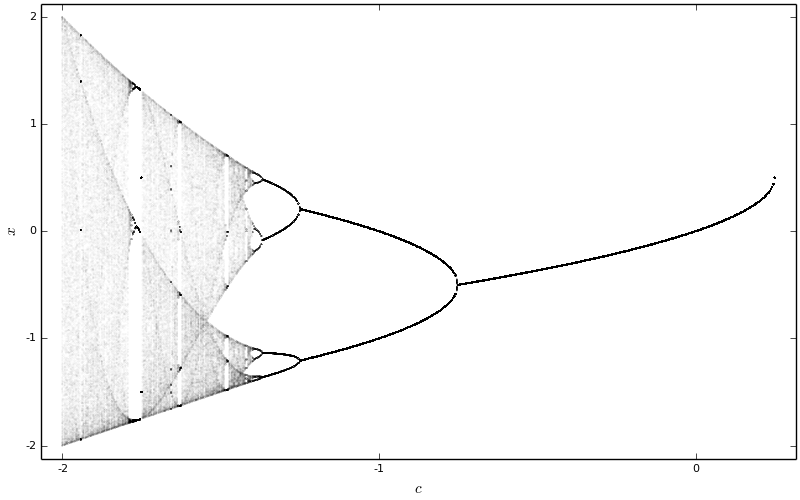

In [15]:
c_parametro, orbita = bifurcation_function(0.5, 1000, -2.0:1/256:1/4, 500)
scatter(c_parametro,orbita, markersize=0.01, c=:blue, leg=false, grid=false, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))

In [16]:
length(orbita)

289077